**Kickstarter project EDA**

Exploring Data with 375000+ Kickstarter projects from 2009-2017,which includes
project name, category, launch date, deadline, goal, amount pledged, number of backers, state, and country to find how many projects have been successfull,trends of success rate over the years and as an investor, what types of projects should you be looking at to guarantee future success.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data


In [ ]:
df=pd.read_csv('kickstarter_projects.csv')

In [ ]:
# There are 374853 rows & 12 variables in the data set.
df.shape

(374853, 12)

In [ ]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,31-05-2009,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,20-07-2009,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,03-05-2009,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,14-07-2009,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27,26-05-2009,1900,387,10,Failed


In [ ]:
df.tail()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02,16-01-2018,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02,09-02-2018,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02,16-01-2018,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02,01-02-2018,650,7,1,Live
374852,1339173863,Spirits of the Forest,Games,Tabletop Games,Spain,2018-01-02,26-01-2018,24274,4483,82,Live


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [ ]:
df.isnull().sum()

ID             0
Name           0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [ ]:
df.isnull().sum()/len(df)

ID             0.0
Name           0.0
Category       0.0
Subcategory    0.0
Country        0.0
Launched       0.0
Deadline       0.0
Goal           0.0
Pledged        0.0
Backers        0.0
State          0.0
dtype: float64

In [ ]:
df.describe()

,ID,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000


In [ ]:
df.columns

Index(['ID', 'Name', 'Category', 'Subcategory', 'Country', 'Launched',
       'Deadline', 'Goal', 'Pledged', 'Backers', 'State'],
      dtype='object')

## Target Feature: Success

In [ ]:
df.State.value_counts()

Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: State, dtype: int64

In [ ]:
# mylabels=df["Category"].unique()
# print(mylabels)
df[df.State=="Successful"].Category.value_counts().index.tolist()

['Music',
 'Film & Video',
 'Games',
 'Publishing',
 'Art',
 'Design',
 'Theater',
 'Technology',
 'Food',
 'Comics',
 'Fashion',
 'Photography',
 'Dance',
 'Crafts',
 'Journalism']

Text(0.5, 1.0, 'Project Success rate based on product category')

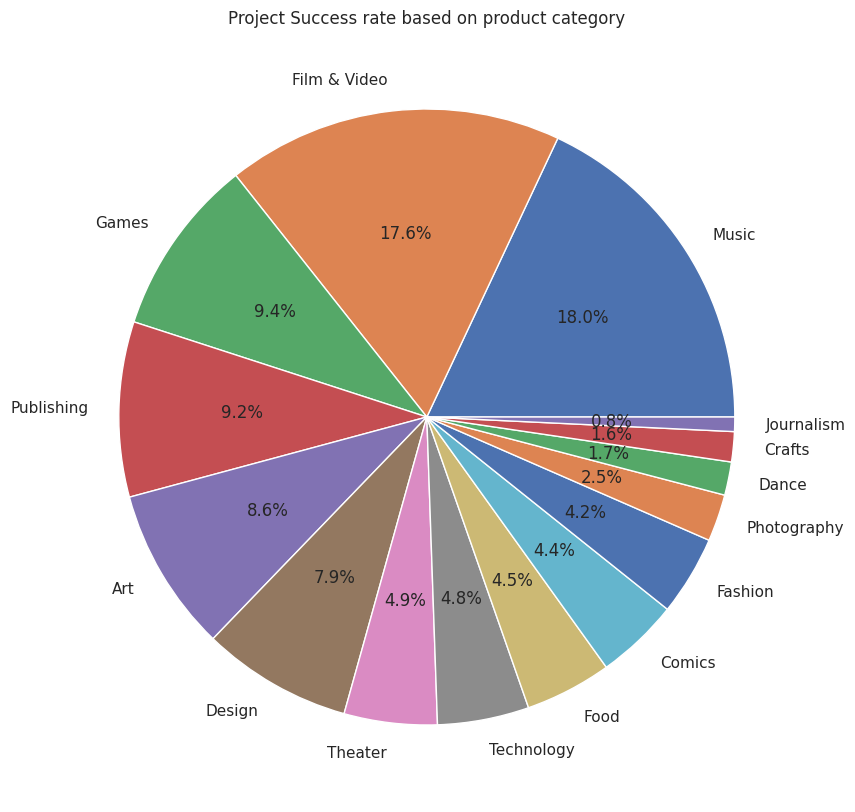

In [ ]:
sns.set(rc={'figure.figsize': [10,10]})

plt.pie(df[df.State=="Successful"].Category.value_counts(),labels = df[df.State=="Successful"].Category.value_counts().index.tolist(), autopct='%.1f%%')
plt.title("Project Success rate based on product category")




With the above pie chart we can identify that Music ,Film & video ctegory has the highest percentage of 18% & 17.6% Success rate respectively.
with this we can say that only Music , film & video projects has been successful while looking at succesfull projects with more than 10% success rate.

In [ ]:
# Get project state rate based on category
temp= df.groupby("State").Category.value_counts(normalize=True).mul(100).unstack("Category")

temp.T.Successful

Category
Art              8.599114
Comics           4.364555
Crafts           1.580115
Dance            1.746718
Design           7.881151
Fashion          4.178527
Film & Video    17.640511
Food             4.546100
Games            9.352190
Journalism       0.756065
Music           18.008831
Photography      2.469163
Publishing       9.189322
Technology       4.806090
Theater          4.881547
Name: Successful, dtype: float64

In [ ]:
df['Year']=df['Launched'].str[:4]# Get first four letters from Launched row value


df.tail()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02,16-01-2018,500,0,0,Live,2018
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02,09-02-2018,15000,269,8,Live,2018
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02,16-01-2018,10000,165,3,Live,2018
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02,01-02-2018,650,7,1,Live,2018
374852,1339173863,Spirits of the Forest,Games,Tabletop Games,Spain,2018-01-02,26-01-2018,24274,4483,82,Live,2018


**Note:** *Pallu*, always start with univariate analysis and then you can work bivariate analysis. So I'd recommend you to start by plotting pie chart for State and also analyse other numeric and categorical variable on their own.

## Univariate Analysis

Univariate analysis is one of most common and simplest form of analyzing data. It explores each feature/variable in a data set, separately.

([<matplotlib.patches.Wedge at 0x7f337bc50430>,
 [Text(-0.10230169925397394, 1.1956313655678952, 'Failed'),
  Text(-0.3296646798120835, -1.1538289296444237, 'Successful'),
  Text(1.1040820860305496, -0.47010929293774895, 'Canceled'),
  Text(1.1982297328995337, -0.06515755670305967, 'Live'),
  Text(1.1998570136718696, -0.018524220426864357, 'Suspended')],
 [Text(-0.05967599123148479, 0.6974516299146054, '52.7%'),
  Text(-0.19230439655704873, -0.6730668756259137, '35.7%'),
  Text(0.6440478835178206, -0.27423042088035354, '10.3%'),
  Text(0.6989673441913946, -0.03800857474345147, '0.7%'),
  Text(0.6999165913085905, -0.010805795249004206, '0.5%')])

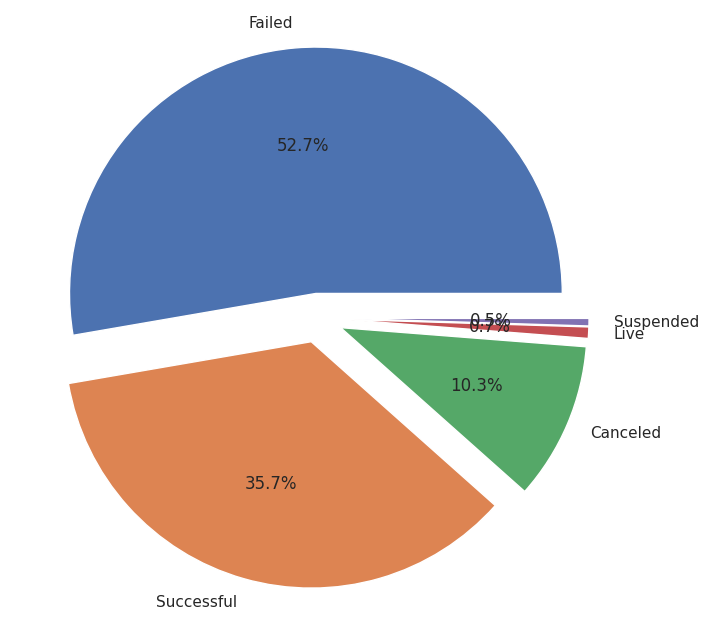

In [ ]:
sns.set(font_scale=1.0, style="darkgrid")
explode=[0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(10,8))
plt.pie(df.State.value_counts(),labels=df.State.value_counts().index.tolist(),explode=explode,autopct='%.1f%%')

The above pie chart gives an overview on the percentage distributed between failed,successful,cancelled,live & suspended projects.
With highest number of projects being failed(52.7%) & successful projects (35.7%).

In [ ]:
# Pallu Check if your pie chart labels are right!
df.State.value_counts()# Heres how you can get the correct labels

Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: State, dtype: int64

### Numerical Features

In [ ]:
df.Goal.describe()

count    3.748530e+05
mean     4.586378e+04
std      1.158778e+06
min      0.000000e+00
25%      2.000000e+03
50%      5.500000e+03
75%      1.600000e+04
max      1.663614e+08
Name: Goal, dtype: float64

In [ ]:
df.Pledged.describe()

count    3.748530e+05
mean     9.121073e+03
std      9.132054e+04
min      0.000000e+00
25%      3.100000e+01
50%      6.250000e+02
75%      4.051000e+03
max      2.033899e+07
Name: Pledged, dtype: float64

### Categorical features

<Axes: xlabel='Category', ylabel='count'>

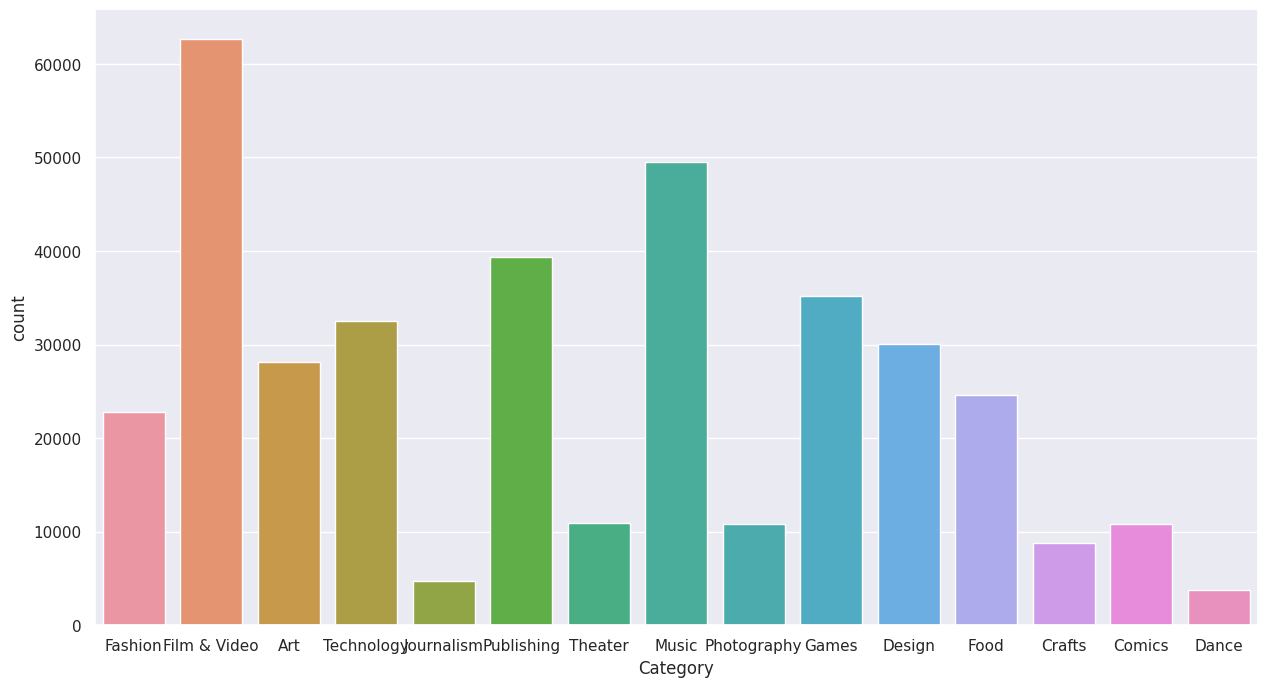

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='Category',data=df)

Looking at the count of project categories Film/video & Music projects are more in number when compared to other categories.

<Axes: xlabel='Subcategory', ylabel='count'>

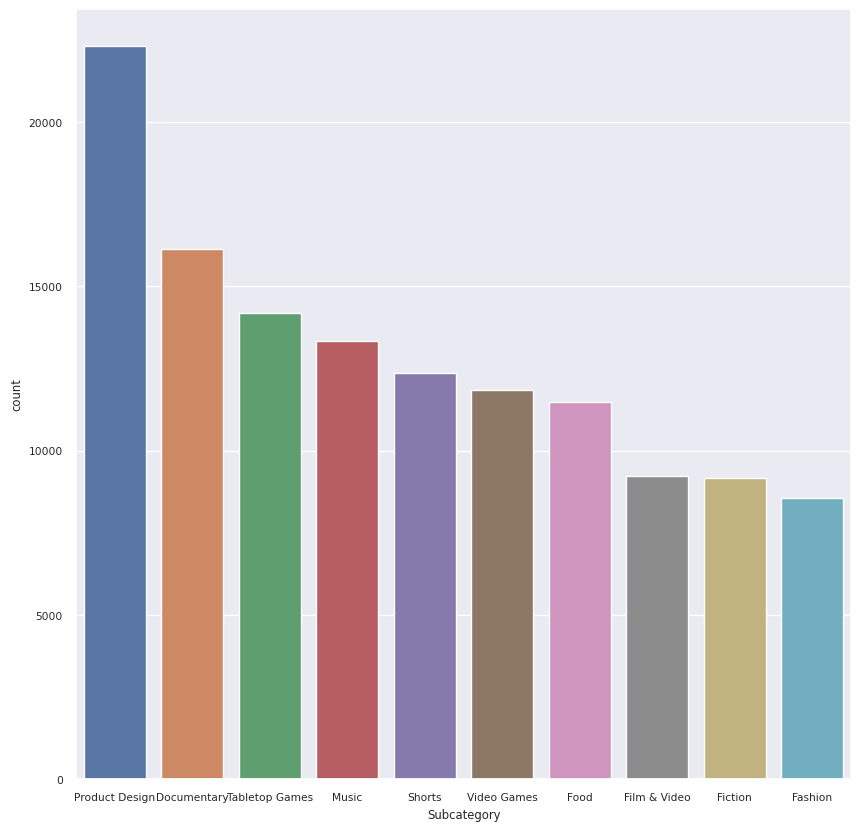

In [ ]:
sns.set(rc={'figure.figsize': [10,10]},font_scale=0.7, style="darkgrid")
sns.countplot(x='Subcategory',data=df,order=df.Subcategory.value_counts().iloc[:10].index) #to get Top 10 subcategory


We are considering the top 10 categories here to check the count, since the visualisation is not clear with more than 100 subcategories in one frame.
With which we could notice that highest performer being Product design & lowest being Fashion sub categorical projects.

<Axes: xlabel='Country', ylabel='count'>

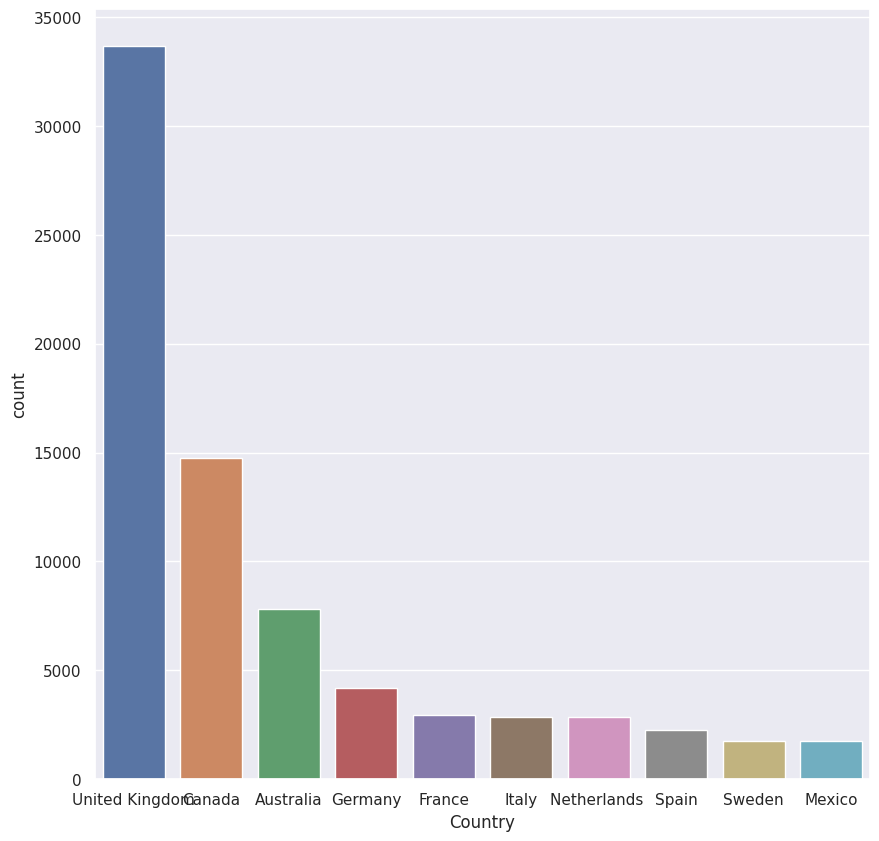

In [ ]:
sns.set(rc={'figure.figsize': [10,10]},font_scale=1.0, style="darkgrid")
sns.countplot(x='Country',data=df,order=df.Country.value_counts().iloc[1:11].index)

Same as Subcategory analysis, here we are considering top 10 countries performance excluding USA,where USA being the highest performer hence excluding that region to find other country performance ,apart from US,UK & Canada are good performers in acheiving project success .

## Bivariate Analysis

In [ ]:
new_df=df[df.Goal>1000]
new_df['Goal reached'] = np.where(new_df["Goal"]>new_df["Pledged"], 0,1)
new_df['Goal reached'].value_counts(normalize=True).mul(100).head()

<ipython-input-40-dcf88b022ef5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Goal reached'] = np.where(new_df["Goal"]>new_df["Pledged"], 0,1)


0    66.590331
1    33.409669
Name: Goal reached, dtype: float64

In [ ]:
new_df.Pledged.mean()

10721.373993113839

In [ ]:
new_df[new_df['Goal reached']==1].Pledged.mean()

28863.299550021926

From the above calculation we could notice that 66.5% of kickstarter projects were unsuccessful with pledged money more than 1000 USD towards project completion/ goal acheived.

Average Pledged money is 10721 USD.

Average pledged money in successful project is 28863 USD





### Categorical Feature- Category, state

In [ ]:
pledged=df[['Year','Category','State']]
pledged.head(10)

,Year,Category,State
0,2009,Fashion,Failed
1,2009,Film & Video,Failed
2,2009,Art,Successful
3,2009,Technology,Successful
4,2009,Fashion,Failed
5,2009,Journalism,Successful
6,2009,Film & Video,Failed
7,2009,Publishing,Successful
8,2009,Theater,Canceled
9,2009,Music,Failed


<Axes: xlabel='Category', ylabel='Year'>

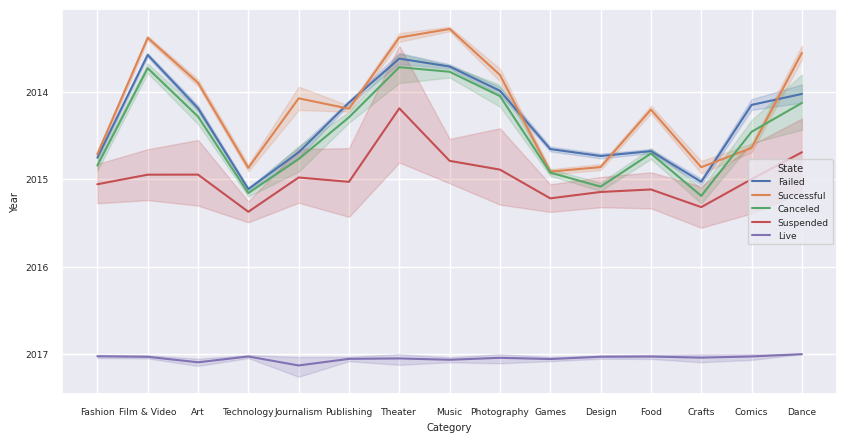

In [ ]:
sns.lineplot(data=df,x='Category',y='Year',hue="State")

Above analysis shows performance trend of different project categories from 2014-2017. Where film/video,Publishing,Music & Theater kickstarter projects show Successful trend when compared to other projects.

### Numerical Feature- Year

<Axes: xlabel='Year'>

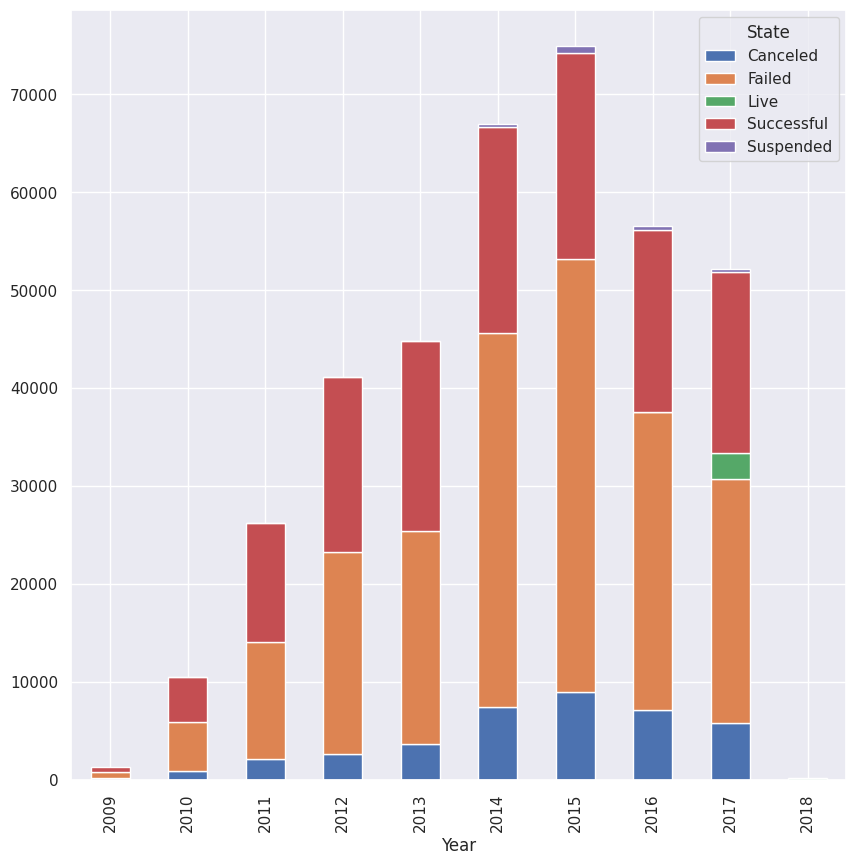

In [ ]:
sns.set(rc={'figure.figsize': [10,10]},font_scale=1.0, style="darkgrid")
pledged.groupby(['Year','State']).size().unstack(level=1).plot(kind='bar',stacked=True)

When looked at the trends in success rate over the years irrespective of categories , below are the points explains the trend:


*  We can notice more number of projects being implemented & being successful during 2014 & 2015.
*  we can notice skewness between successful & failed in project counts, however focusing on the successful projects are more post 2015.
*  Between 2014-15 there are high Failed projects.






In [ ]:
pledged[pledged['State']=='Successful'].groupby(['Year','Category']).size().unstack(level=1).head(50)

Category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
Year,,,,,,,,,,,,,,,
2009,77,12,4,3,8,4,124,17,23,20,157,31,57,19,23
2010,382,110,19,108,69,43,1473,120,70,68,1295,190,222,65,359
2011,1189,268,46,299,302,186,3317,258,284,67,3763,331,758,140,963
2012,1694,548,126,368,760,435,3771,682,941,88,4944,407,1639,325,1164
2013,1684,753,213,388,1255,776,4029,947,1490,81,3757,443,1951,672,963
2014,1783,820,381,413,1718,978,3599,1385,1984,172,3127,543,2050,1142,1011
2015,1707,994,526,293,2046,1094,3004,1171,2263,248,2611,539,1973,1601,901
2016,1311,1097,401,262,2130,926,2391,791,2592,145,2340,469,1849,1307,664
2017,1683,1240,399,204,2261,1151,1904,714,2871,123,2111,352,1801,1162,486


In [ ]:
pledged.groupby(['Year','State']).size().unstack(level=1).head(50)

State,Canceled,Failed,Live,Successful,Suspended
Year,,,,,
2009,150.0,600.0,NaN,579.0,NaN
2010,926.0,4984.0,NaN,4593.0,16.0
2011,2144.0,11877.0,NaN,12171.0,44.0
2012,2631.0,20586.0,NaN,17892.0,52.0
2013,3690.0,21686.0,NaN,19402.0,58.0
2014,7418.0,38199.0,NaN,21106.0,270.0
2015,8926.0,44301.0,NaN,20971.0,721.0
2016,7098.0,30421.0,1.0,18675.0,341.0
2017,5766.0,24957.0,2675.0,18462.0,340.0


<Axes: xlabel='Year', ylabel='count'>

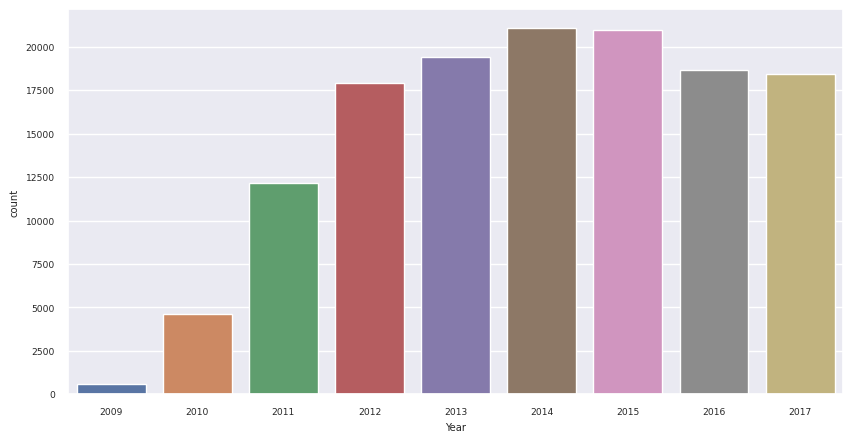

In [ ]:
pledged[pledged['State']=='Successful']
sns.countplot(x='Year',data=pledged[pledged['State']=='Successful'])


In [ ]:
pledged[pledged['State']=='Successful'].Year.value_counts().head(10)

2014    21106
2015    20971
2013    19402
2016    18675
2017    18462
2012    17892
2011    12171
2010     4593
2009      579
Name: Year, dtype: int64

There are more Successful Kickstarter projects in the year 2014 & could notice slight difference in success rate between 2015 & 2014 .

<Axes: xlabel='Year', ylabel='count'>

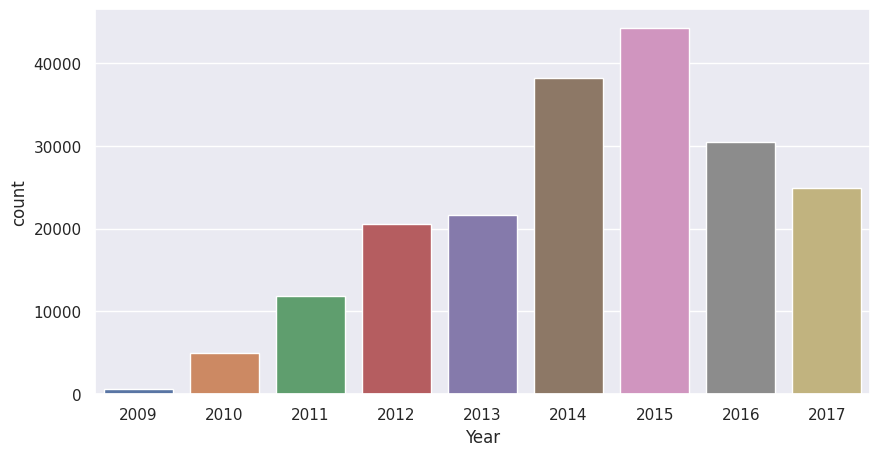

In [ ]:
pledged[pledged['State']=='Failed']
sns.countplot(x='Year',data=pledged[pledged['State']=='Failed'])

From the above plot we could notice highest unsuccessful projects during the Year 2015, we could also understand there is skewness between success & failed projects during this time of the year .

<Axes: xlabel='Category'>

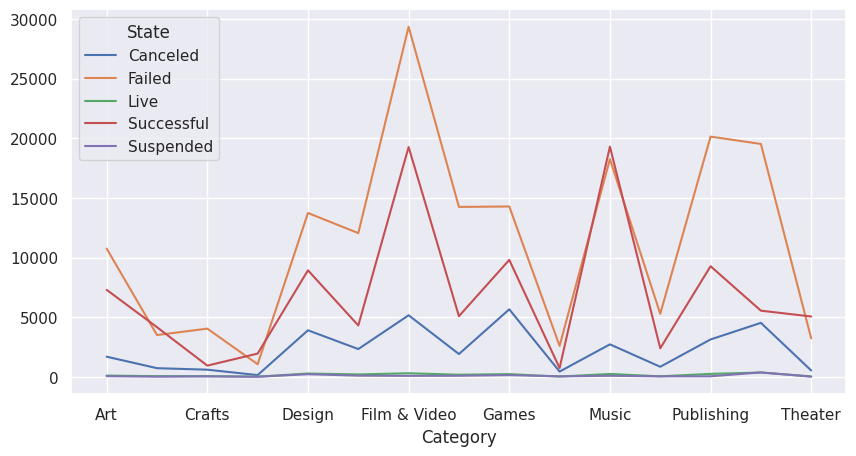

In [ ]:
# Considered new data frame here with projects Goal > 1000USD
sns.set(rc={'figure.figsize': [10,5]},font_scale=1.0, style="darkgrid")
new_df.groupby(['Category','State']).size().unstack(level=1).plot(kind='line')

From the visual above, we could notice that kickstarter project category- film/Video & Music are more sucessful with Goal value >1000 USD , however there are high failed projects compared to success rate.